In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sb

In [17]:
df_master = pd.read_csv('../Data/master_data.csv')
#drop the index and date columns
df_master = df_master.drop(columns=['id', 'date'])

#convert the start_time column to minutes after midnight
df_master['start_time'] = pd.to_datetime(df_master['start_time'] , format='%H:%M:%S')
df_master['start_time'] = df_master['start_time'].dt.hour * 60 + df_master['start_time'].dt.minute

#drop the rows with missing values
df_master = df_master.dropna()

#create a dataframe for each bus line
lines = [67, 80, 100, 121, 139, 439, 467, 480]
dfs = {}

for line in lines:
    dfs[f'df_{line}'] = df_master[df_master['line'] == line].drop(columns=['line'])
    print(f"First few rows of df_{line}:")
    print(dfs[f'df_{line}'].head())
    print("\n")

df_master = df_master.drop(columns=['line'])


First few rows of df_67:
     delay_end  start_time  temp_start  rain_amt  total_snow  snow_amt  \
759          3          17        15.1       0.0         0.0       0.0   
760         10          41        15.1       0.0         0.0       0.0   
761         -6          70        13.7       0.0         0.0       0.0   
762         12         309        11.8       0.0         0.0       0.0   
763          7         337        11.8       0.0         0.0       0.0   

     delay_start  
759            0  
760            0  
761           -1  
762           -1  
763            0  


First few rows of df_80:
     delay_end  start_time  temp_start  rain_amt  total_snow  snow_amt  \
954        -10          19        15.1       0.0         0.0       0.0   
955         -6          45        15.1       0.0         0.0       0.0   
956         -6          75        13.7       0.0         0.0       0.0   
957         -4         315        11.8       0.0         0.0       0.0   
958          2     

In [18]:
df_test = df_master

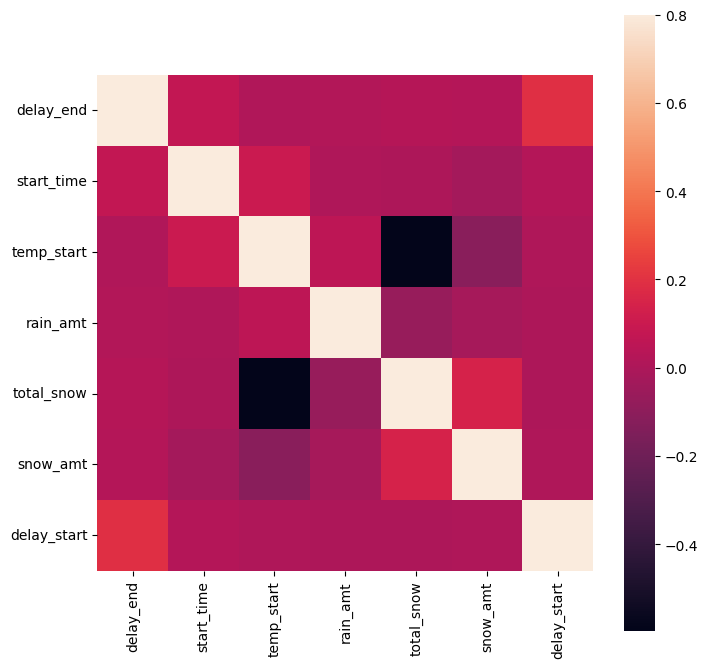

In [19]:
Corr_mat = df_test.corr()
fig = plt.figure(figsize = (8,8))

sb.heatmap(Corr_mat, vmax = .8, square = True)
plt.show()

In [20]:
predictors = ['delay_start', 'start_time', 'temp_start', 'rain_amt', 'snow_amt','total_snow']
outcome = 'delay_end'

In [21]:
for i in range(len(predictors)):
    for j in range(len(predictors)):
        if i<j:
            corr, _ = pearsonr(df_test[predictors[i]], df_test[predictors[j]])
            print('The correlation between', predictors[i], 'and', predictors[j], 'is', corr)

The correlation between delay_start and start_time is 0.02443191113084113
The correlation between delay_start and temp_start is 0.005926468145248259
The correlation between delay_start and rain_amt is 0.003918746683696845
The correlation between delay_start and snow_amt is 0.008249960576945194
The correlation between delay_start and total_snow is 0.0026971357639256933
The correlation between start_time and temp_start is 0.10077189984427726
The correlation between start_time and rain_amt is 0.004253340019246771
The correlation between start_time and snow_amt is -0.024176273843384742
The correlation between start_time and total_snow is 0.0012400282731235145
The correlation between temp_start and rain_amt is 0.05680562338511451
The correlation between temp_start and snow_amt is -0.11309762999522555
The correlation between temp_start and total_snow is -0.5955963971007743
The correlation between rain_amt and snow_amt is -0.018916201405556044
The correlation between rain_amt and total_snow i

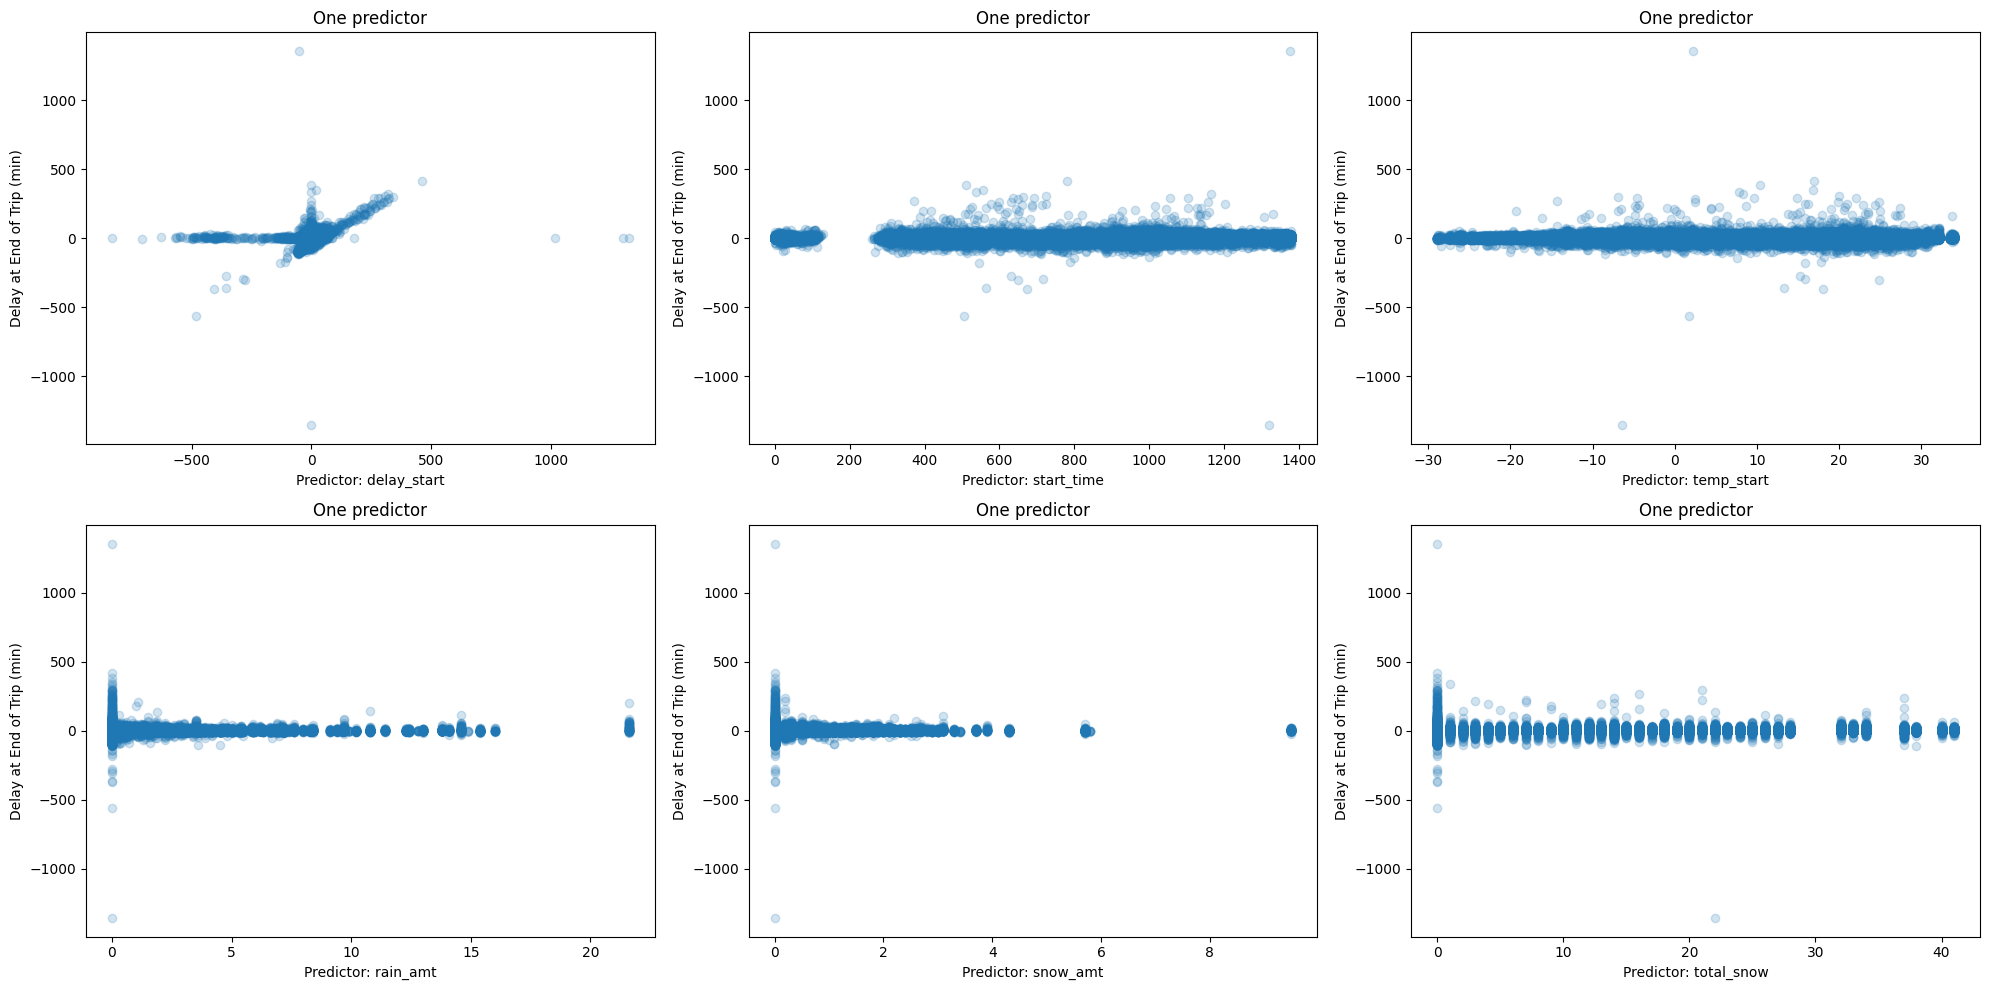

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

for i, axi in enumerate(ax.flat):
    axi.scatter(df_test[predictors[i]], df_test[outcome], color='tab:blue', alpha=0.2)
    axi.set_ylabel('Delay at End of Trip (min)')
    axi.set_xlabel(f'Predictor: {predictors[i]}')
    axi.set_title("One predictor");

plt.tight_layout()
plt.show()